# IABAC PROJECT 

## IMPORTING PACKAGES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,9
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
pca = PCA()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile
vectorizer = TfidfVectorizer()
from sklearn.svm import SVC
from xgboost import XGBClassifier
model = XGBClassifier()
import scipy.stats as st
from xgboost.sklearn import XGBRegressor 

## IMPORTING DATA-SET

In [2]:
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## UNDERSTANDING THE DATA

In [3]:
print(data.size) ## determinig the number elements
print(data.shape) ## determinig the number od rowsXcolumns

33600
(1200, 28)


In [4]:
data.info() ##information of the column datatypes and null values
## A valuable outcome from inormation is to determine if any corrupt(unnecessary values)are present by interpreting the datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [5]:
data.describe() ##dataframe description

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## DATA PRE-PROCESSING

### CHECKING FOR NULL VALUES 

In [6]:
data.isnull().sum()## checking null values in data frame

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### CHECKING OUTLIERS 

In [7]:
z = np.abs(stats.zscore(data.loc[:,['Age','DistanceFromHome','DistanceFromHome','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PerformanceRating']]))
print(z)
##In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

[[0.54145787 0.10206085 0.10206085 ... 0.68137224 1.10025139 0.09961771]
 [1.10988772 0.59146353 0.59146353 ... 0.37083419 0.8177735  0.09961771]
 [0.33925978 0.5096925  0.5096925  ... 0.37083419 2.23016296 2.02770238]
 ...
 [1.44015684 2.30437292 2.30437292 ... 0.25024191 1.10025139 0.09961771]
 [0.32127846 0.02028982 0.02028982 ... 1.49239412 0.8177735  0.09961771]
 [1.42217552 0.75439384 0.75439384 ... 0.06029614 1.15957175 1.82846697]]


In [8]:
threshold = 3
print(np.where(z > 3))
##threshold to identify an outlier.
##The first array contains the list of row numbers and second array respective column numbers
print(z[3][16])

(array([   3,   25,   25,   52,   72,   77,  100,  100,  126,  137,  151,
        175,  178,  216,  252,  272,  272,  283,  283,  295,  308,  308,
        312,  316,  320,  320,  330,  342,  347,  361,  361,  387,  450,
        450,  456,  471,  475,  475,  490,  490,  528,  555,  571,  613,
        615,  615,  617,  639,  642,  655,  658,  703,  716,  730,  785,
        816,  816,  817,  818,  845,  845,  864,  864,  864,  867,  867,
        867,  888,  911,  921,  921,  946,  956,  956,  962,  962,  989,
        989,  999, 1036, 1083, 1083, 1104, 1117, 1117, 1135, 1152, 1156,
       1160], dtype=int64), array([16, 14, 17, 14, 17, 11, 14, 16, 17, 16, 15, 15, 14, 16, 16, 14, 16,
       16, 17, 11, 14, 16, 14, 16, 16, 17, 16, 11, 14, 15, 16, 16, 14, 16,
       16, 14, 11, 14, 14, 16, 11, 16, 16, 16, 11, 16, 16, 15, 16, 17, 15,
       11, 16, 15, 17, 14, 16, 15, 16, 11, 14, 15, 16, 17, 11, 14, 16, 17,
       16, 14, 15, 16, 15, 17, 14, 16, 11, 14, 15, 16, 16, 17, 14, 14, 16,
       11, 1

In [9]:
data = data[(z < 3).all(axis=1)]
##data without outliers

In [12]:
print(data.shape)

(1134, 28)


In [11]:
fdata = data.copy()

## INVESTIGATING UNNECESSARY COLUMNS 

In [13]:
data.drop(['EmpNumber'],axis=1,inplace=True) ## droping the EmpNumber Column

## EXPLICIT TYPE CONVERSION OF DATA TYPE (STRING --> FLOAT)

In [14]:
data = pd.get_dummies(data, drop_first=True)

In [24]:
data.to_csv('INX_Future_Inc.csv',index=False)

## STATISTICS 

### EXPLORATORY ANALYSIS

In [15]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1134 non-null object
Age                             1134 non-null int64
Gender                          1134 non-null object
EducationBackground             1134 non-null object
MaritalStatus                   1134 non-null object
EmpDepartment                   1134 non-null object
EmpJobRole                      1134 non-null object
BusinessTravelFrequency         1134 non-null object
DistanceFromHome                1134 non-null int64
EmpEducationLevel               1134 non-null int64
EmpEnvironmentSatisfaction      1134 non-null int64
EmpHourlyRate                   1134 non-null int64
EmpJobInvolvement               1134 non-null int64
EmpJobLevel                     1134 non-null int64
EmpJobSatisfaction              1134 non-null int64
NumCompaniesWorked              1134 non-null int64
OverTime                        1134 non-null object
E

In [16]:
fdata.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
3,831,831,831,831,831,831,831,831,831,831,...,831,831,831,831,831,831,831,831,831,831
4,126,126,126,126,126,126,126,126,126,126,...,126,126,126,126,126,126,126,126,126,126


### DEPARTMENT WISE PERFORMANCE RATING  

In [17]:
fdata.groupby('EmpDepartment').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpDepartment,,,,,,,,,,,,,,,,,,,,,
Data Science,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Development,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
Finance,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
Human Resources,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
Research & Development,324,324,324,324,324,324,324,324,324,324,...,324,324,324,324,324,324,324,324,324,324
Sales,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,351


In [31]:
Data_science = fdata[fdata['EmpDepartment'] == 'Data Science']
Data_science.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 5%, Excellent = 85%, Outstanding = 10%

In [32]:
Development = fdata[fdata['EmpDepartment'] == 'Development']
Development.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
3,286,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286
4,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


#### Good = 3.79%, Excellent = 83.382%, Outstanding = 12.827% 

In [33]:
Finance = fdata[fdata['EmpDepartment'] == 'Finance']
Finance.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
3,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#### Good = 27.66%, Excellent = 63.82%, Outstanding = 8.51% 

In [34]:
Human_Resources = fdata[fdata['EmpDepartment'] == 'Human Resources']
Human_Resources.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
4,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


#### Good = 18.367%, Excellent = 69.38%, Outstanding = 12.24% 

In [35]:
R_D = fdata[fdata['EmpDepartment' ] == 'Research & Development']
R_D.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
3,221,221,221,221,221,221,221,221,221,221,...,221,221,221,221,221,221,221,221,221,221
4,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39


#### Good = 19.75%, Excellent = 68.20%, Outstanding = 12.03% 

In [37]:
Sales = fdata[fdata['EmpDepartment'] == 'Sales']
Sales.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
3,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
4,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


#### Good = 21.93%, Excellent = 69.23%, Outstanding = 8.831% 

### LOW PERFORMANCE: 
### Development < Data_Science < HR < R & D < Sales < Finance

### CORELATION OF DATAFRAME

In [39]:
Correlation = fdata.corr()

## TOP 3 FACTORS EFFECTING EMPLOYEE PERFORMANCE

In [40]:
Correlation[Correlation.PerformanceRating>0.1]

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
EmpEnvironmentSatisfaction,0.021597,-0.019757,-0.035202,1.000000,-0.041235,0.003084,0.007520,-0.012140,0.024384,-0.044691,-0.001641,-0.007263,0.005260,0.001589,0.002558,0.041767,0.016727,0.000857,0.385213
EmpLastSalaryHikePercent,-0.013295,0.039494,0.004119,-0.044691,-0.021561,-0.002591,-0.024385,0.028653,-0.014920,1.000000,-0.041521,-0.019483,-0.015407,-0.019579,-0.017438,-0.019139,-0.037455,-0.010988,0.362314
EmpWorkLifeBalance,-0.020761,-0.043621,0.007206,0.001589,0.011758,-0.003078,0.047607,-0.023997,0.010619,-0.019579,0.002179,0.013459,0.038351,1.000000,0.026375,0.038006,0.019085,0.009916,0.136532
PerformanceRating,-0.028841,-0.053563,0.025877,0.385213,-0.023264,-0.010636,-0.062440,-0.009763,0.018579,0.362314,-0.010122,-0.053270,-0.008186,0.136532,-0.132289,-0.136944,-0.191297,-0.124995,1.000000


### EMPLOYEE ENVIRONMENT SATISFACTION 

In [41]:
fdata.groupby('EmpEnvironmentSatisfaction').count()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpEnvironmentSatisfaction,,,,,,,,,,,,,,,,,,,,,
1,215,215,215,215,215,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
2,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
3,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348
4,342,342,342,342,342,342,342,342,342,342,...,342,342,342,342,342,342,342,342,342,342


In [43]:
Low = fdata[fdata['EmpEnvironmentSatisfaction'] == 1]
Low.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
3,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
4,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


#### Good = 38.13%, Excellent = 55.81%, Outstanding = 6.04% 

In [47]:
Medium = fdata[fdata['EmpEnvironmentSatisfaction'] == 2]
Medium.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
3,126,126,126,126,126,126,126,126,126,126,...,126,126,126,126,126,126,126,126,126,126
4,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


#### Good = 38.86%, Excellent = 55.02%, Outstanding = 6.11% 

In [48]:
High = fdata[fdata['EmpEnvironmentSatisfaction'] == 3]
High.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,295,295,295,295,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
4,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


#### Good = 0.86%, Excellent = 84.77%, Outstanding = 14.36% 

In [49]:
Very_High = fdata[fdata['EmpEnvironmentSatisfaction'] == 4]
Very_High.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,290,290,290,290,290,290,290,290,290,290,...,290,290,290,290,290,290,290,290,290,290
4,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


#### Good = 0.87%, Excellent = 84.79%, Outstanding = 14.32%

###  Employee Environment Satisfaction is highly important for its performance:

#### Number of Employee with Good performance:

##### Very_High < High < Low < Medium
#### ----------------------------------------------------------------
#### Number of Employee with Outstanding performance:

##### Low < Medium < Very_High < High


## EMPLOYEE LAST SALARY HIKE PERCENT 

In [50]:
fdata.groupby('EmpLastSalaryHikePercent').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpLastSalaryHikePercent,,,,,,,,,,,,,,,,,,,,,
11,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159
12,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
13,160,160,160,160,160,160,160,160,160,160,...,160,160,160,160,160,160,160,160,160,160
14,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
15,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
16,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
17,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
18,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
19,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62


In [52]:
P11 = fdata[fdata['EmpLastSalaryHikePercent'] == 11]
P11.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,134,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134


#### Good = 15.72%, Excellent = 84.27%, Outstanding = 0% 

In [53]:
P12 = fdata[fdata['EmpLastSalaryHikePercent'] == 12]
P12.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
3,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 19.31%, Excellent = 79.31%, Outstanding = 1.37%

In [56]:
P13 = fdata[fdata['EmpLastSalaryHikePercent'] == 13]
P13.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


#### Good = 16.875%, Excellent = 81.25%, Outstanding = 1.875% 

In [57]:
P14 = fdata[fdata['EmpLastSalaryHikePercent'] == 14]
P14.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#### Good = 16.67%, Excellent = 84.56%, Outstanding = 2.46%

In [58]:
P15 = fdata[fdata['EmpLastSalaryHikePercent'] == 15]
P15.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#### Good = 11.84%, Excellent = 82.89%, Outstanding = 5.26% 

In [59]:
P16 = fdata[fdata['EmpLastSalaryHikePercent'] == 16]
P16.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 16.67%, Excellent = 80.30%, Outstanding = 3.03%

In [60]:
P17 = fdata[fdata['EmpLastSalaryHikePercent'] == 17]
P17.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


####  Good = 14.062%, Excellent = 81.25%, Outstanding = 4.687%

In [61]:
P18 = fdata[fdata['EmpLastSalaryHikePercent'] == 18]
P18.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60


#### Good = 13.04%, Excellent = 86.95%, Outstanding = 0% 

In [62]:
P19 = fdata[fdata['EmpLastSalaryHikePercent'] == 19]
P19.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 16.12%, Excellent = 80.64%, Outstanding = 3.22% 

In [63]:
P20 = fdata[fdata['EmpLastSalaryHikePercent'] == 20]
P20.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


#### Good = 18%, Excellent = 28%, Outstanding = 54% 

In [64]:
P21 = fdata[fdata['EmpLastSalaryHikePercent'] == 21]
P21.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23


#### Good = 12.12%, Excellent = 18.8%, Outstanding = 69.69% 

In [65]:
P22 = fdata[fdata['EmpLastSalaryHikePercent'] == 22]
P22.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


#### Good = 11.11%, Excellent = 28.88%, Outstanding = 60% 

In [66]:
P23 = fdata[fdata['EmpLastSalaryHikePercent'] == 23]
P23.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


#### Good = 11.76%, Excellent = 11.76%, Outstanding = 76.47%

In [67]:
P24 = fdata[fdata['EmpLastSalaryHikePercent' ] == 24]
P24.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


#### Good = 11.76%, Excellent = 29.41%, Outstanding = 58.82%

In [68]:
P25 = fdata[fdata['EmpLastSalaryHikePercent'] == 25]
P25.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


#### Good = 0%, Excellent = 33.33%, Outstanding = 66.66% 

###  Employee salary hike affect on their performance.
### 11 - 19 % hike doesn't effect that much but after 19% hike performance increase instantly 

## EMPLOYEE WORK LIFE BALANCE 

In [69]:
fdata['EmpWorkLifeBalance'].unique()

array([2, 3, 4, 1], dtype=int64)

In [70]:
fdata.groupby('EmpWorkLifeBalance').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpWorkLifeBalance,,,,,,,,,,,,,,,,,,,,,
1,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2,279,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
3,685,685,685,685,685,685,685,685,685,685,...,685,685,685,685,685,685,685,685,685,685
4,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


In [71]:
Bad = fdata[fdata['EmpWorkLifeBalance'] == 1]
Bad.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
3,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45


#### Good = 26.22%, Excellent = 73.77%, Outstanding = 0% 

In [72]:
Good = fdata[fdata['EmpWorkLifeBalance'] == 2]
Good.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
3,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
4,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


#### Good = 16.60%, Excellent = 71.28%, Outstanding = 8.65% 

In [73]:
Better = fdata[fdata['EmpWorkLifeBalance'] == 3]
Better.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
3,507,507,507,507,507,507,507,507,507,507,...,507,507,507,507,507,507,507,507,507,507
4,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76


#### Good = 14.89%, Excellent = 74.01%, Outstanding = 11.09% 

In [74]:
Best = fdata[fdata['EmpWorkLifeBalance'] == 4]
Best.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
4,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


#### Good = 10.09%, Excellent = 66.97%, Outstanding = 22.93% 

### Employee should need balanced work life so that they perform well.
### Here decrease in number of people with bad performance and increase in number of people with outstanding performance.

## DATA VISUALIZATION 

In [18]:
fdata.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4


In [19]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1134 non-null object
Age                             1134 non-null int64
Gender                          1134 non-null object
EducationBackground             1134 non-null object
MaritalStatus                   1134 non-null object
EmpDepartment                   1134 non-null object
EmpJobRole                      1134 non-null object
BusinessTravelFrequency         1134 non-null object
DistanceFromHome                1134 non-null int64
EmpEducationLevel               1134 non-null int64
EmpEnvironmentSatisfaction      1134 non-null int64
EmpHourlyRate                   1134 non-null int64
EmpJobInvolvement               1134 non-null int64
EmpJobLevel                     1134 non-null int64
EmpJobSatisfaction              1134 non-null int64
NumCompaniesWorked              1134 non-null int64
OverTime                        1134 non-null object
E

### DEPARTMENT WISE PERFORMANCE RATING VISUALIZATION 

In [20]:
dep_wise = fdata[['EmpDepartment','PerformanceRating']]

In [21]:
dep_wise.head()

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
4,Sales,3
5,Development,4


In [22]:
dep = pd.crosstab(dep_wise.EmpDepartment,dep_wise.PerformanceRating)

In [23]:
dep

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,286,44
Finance,13,30,4
Human Resources,9,34,6
Research & Development,64,221,39
Sales,77,243,31


In [24]:
dep.reset_index(inplace=True)

In [25]:
dep

PerformanceRating,EmpDepartment,2,3,4
0,Data Science,1,17,2
1,Development,13,286,44
2,Finance,13,30,4
3,Human Resources,9,34,6
4,Research & Development,64,221,39
5,Sales,77,243,31


In [26]:
x = np.arange(len(dep['EmpDepartment']))
x

array([0, 1, 2, 3, 4, 5])

Text(0.5,1,'Department Wise Performance')

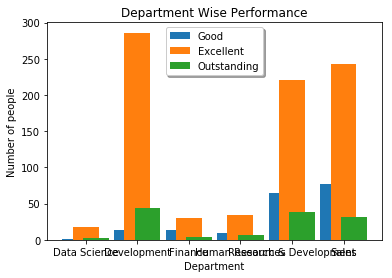

In [27]:
plt.xticks(x,dep['EmpDepartment'])
plt.bar(x-0.2, dep[2],width=0.5,label='Good')
plt.bar(x, dep[3],width=0.5,label='Excellent')
plt.bar(x+0.2, dep[4],width=0.5,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Department')
plt.ylabel('Number of people')
plt.title('Department Wise Performance')

## TOP 3 IMPORTANT FACTOR EFFECT ON PERFORMANCE RATING
### => Employee Environment Satisfaction
### => Employee Last Salary Hike Percentage
### => Employee Work Life Balance 

## Employee Environment Satisfaction 

In [28]:
Num1 = pd.crosstab(fdata.EmpEnvironmentSatisfaction,dep_wise.PerformanceRating)

In [29]:
Num1

PerformanceRating,2,3,4
EmpEnvironmentSatisfaction,,,
1,82,120,13
2,89,126,14
3,3,295,50
4,3,290,49


In [30]:
Num1.reset_index(inplace=True)

In [31]:
Num1

PerformanceRating,EmpEnvironmentSatisfaction,2,3,4
0,1,82,120,13
1,2,89,126,14
2,3,3,295,50
3,4,3,290,49


In [32]:
x = np.arange(len(Num1['EmpEnvironmentSatisfaction']))
x

array([0, 1, 2, 3])

Text(0.5,1,'Employee Environment Satisfaction Wise Performance')

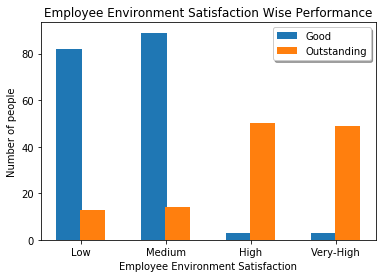

In [33]:
plt.xticks(x,['Low','Medium','High','Very-High'])
plt.bar(x-0.14, Num1[2],width=0.3,label='Good')
plt.bar(x+0.14, Num1[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Environment Satisfaction')
plt.ylabel('Number of people')
plt.title('Employee Environment Satisfaction Wise Performance')

## Employee Last Salary Hike Percent

In [34]:
Num2 = pd.crosstab(fdata.EmpLastSalaryHikePercent,dep_wise.PerformanceRating)

In [35]:
Num2.reset_index(inplace=True)

In [36]:
Num2

PerformanceRating,EmpLastSalaryHikePercent,2,3,4
0,11,25,134,0
1,12,28,115,2
2,13,27,130,3
3,14,27,131,4
4,15,9,63,4
5,16,11,53,2
6,17,9,52,3
7,18,9,60,0
8,19,10,50,2
9,20,9,14,27


In [37]:
x =  np.arange(len(Num2['EmpLastSalaryHikePercent' ]))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Text(0.5,1,'Last Salary Hike percent Wise Performance')

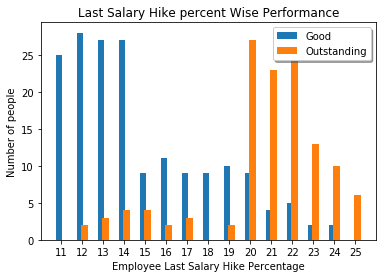

In [38]:
plt.xticks(x,Num2['EmpLastSalaryHikePercent' ])
plt.bar(x-0.1, Num2[2],width=0.3,label='Good')
plt.bar(x+0.1, Num2[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Last Salary Hike Percentage')
plt.ylabel('Number of people')
plt.title('Last Salary Hike percent Wise Performance')

## Employee Work Life Balance

In [39]:
Num3 = pd.crosstab(fdata.EmpWorkLifeBalance,dep_wise.PerformanceRating)

In [40]:
Num3.reset_index(inplace=True)

In [41]:
Num3

PerformanceRating,EmpWorkLifeBalance,2,3,4
0,1,16,45,0
1,2,48,206,25
2,3,102,507,76
3,4,11,73,25


In [42]:
x = np.arange(len(Num3['EmpWorkLifeBalance']))
x

array([0, 1, 2, 3])

Text(0.5,1,'Work Life Balance Wise Performance')

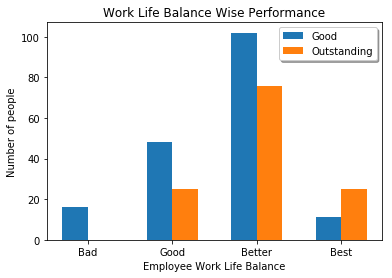

In [43]:
plt.xticks(x,['Bad','Good','Better','Best'])
plt.bar(x-0.15, Num3[2],width=0.3,label='Good')
plt.bar(x+0.15, Num3[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Work Life Balance')
plt.ylabel('Number of people')
plt.title('Work Life Balance Wise Performance')

## PREDICTIVE MODEL

In [44]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1134 non-null object
Age                             1134 non-null int64
Gender                          1134 non-null object
EducationBackground             1134 non-null object
MaritalStatus                   1134 non-null object
EmpDepartment                   1134 non-null object
EmpJobRole                      1134 non-null object
BusinessTravelFrequency         1134 non-null object
DistanceFromHome                1134 non-null int64
EmpEducationLevel               1134 non-null int64
EmpEnvironmentSatisfaction      1134 non-null int64
EmpHourlyRate                   1134 non-null int64
EmpJobInvolvement               1134 non-null int64
EmpJobLevel                     1134 non-null int64
EmpJobSatisfaction              1134 non-null int64
NumCompaniesWorked              1134 non-null int64
OverTime                        1134 non-null object
E

In [60]:
## PCA WAS NOT REQUIRED FOR THE DATA SET AS ONLY UPON TAKING ALL COMPONENTS WERE WE ABLE TO ACHIVE 0.99 SCORE.

#X = pca.fit_transform(X)
#pca.explained_variance_ratio_[0:5].sum() ##0.9974
#X = X.loc[:,[0,1,2,3,4,5]]

In [61]:
X = data.drop(['PerformanceRating'],axis=1)
y=fdata.PerformanceRating

In [46]:
X.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,1,0,0,0,0,0,0,1,0,0
1,47,14,4,4,42,3,2,1,2,12,...,1,0,0,0,0,0,0,1,0,0
2,40,5,4,4,48,2,3,1,5,21,...,1,0,0,0,0,0,1,0,1,0
4,60,16,4,1,84,3,2,1,8,14,...,1,0,0,0,0,0,0,1,0,0
5,27,10,2,4,32,3,3,1,1,21,...,0,0,0,0,0,0,1,0,0,0


In [198]:
y.head()

0    3
1    3
2    4
4    3
5    4
Name: PerformanceRating, dtype: int64

In [199]:
X.isnull().sum()

Age                                          0
DistanceFromHome                             0
EmpEducationLevel                            0
EmpEnvironmentSatisfaction                   0
EmpHourlyRate                                0
EmpJobInvolvement                            0
EmpJobLevel                                  0
EmpJobSatisfaction                           0
NumCompaniesWorked                           0
EmpLastSalaryHikePercent                     0
EmpRelationshipSatisfaction                  0
TotalWorkExperienceInYears                   0
TrainingTimesLastYear                        0
EmpWorkLifeBalance                           0
ExperienceYearsAtThisCompany                 0
ExperienceYearsInCurrentRole                 0
YearsSinceLastPromotion                      0
YearsWithCurrManager                         0
Gender_Male                                  0
EducationBackground_Life Sciences            0
EducationBackground_Marketing                0
EducationBack

In [113]:
y.isnull().sum()

0

In [167]:
X.head()

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,YearsWithCurrManager,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion
0,4,12,2,8,10,7,0
1,4,12,3,7,7,7,1
2,4,21,3,12,18,13,1
4,1,14,3,2,2,2,2
5,4,21,2,7,9,7,1


In [63]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.24, random_state=0)

### TESTS

### RANDOM FOREST 

In [64]:
classifier = RandomForestClassifier(n_estimators=104, random_state=40) ## Random Forest algorithm with N_ESTIMATORS SET AS 104
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [65]:
print(accuracy_score(y_test,y_pred)*100,"%") ##SCORE PREDICTES TO BE 91%

91.57509157509158 %


In [53]:
confusion_matrix(y_test,y_pred) ##confusion matrix

array([[ 34,   7,   0],
       [  4, 193,   3],
       [  1,   8,  23]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.87      0.83      0.85        41
           3       0.93      0.96      0.95       200
           4       0.88      0.72      0.79        32

   micro avg       0.92      0.92      0.92       273
   macro avg       0.89      0.84      0.86       273
weighted avg       0.91      0.92      0.91       273



In [55]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)

In [56]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [57]:
#model = Random Forest(max_depth,max_leaf_nodes,n_estimator)
#GRIDSEARCHCV
parameters = {'max_depth': [25,35,40], 'max_leaf_nodes': [10,20,25],
                     'n_estimators': [115,120,125]}

grid_model = GridSearchCV(RandomForestClassifier(), parameters )
grid_model.fit(X_train, y_train)
print(grid_model.best_score_)
print(grid_model.best_params_)
y_predict = grid_model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

D:\DISCREET\annna\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8373266078184111
{'max_depth': 35, 'max_leaf_nodes': 25, 'n_estimators': 120}
0.8651026392961877
              precision    recall  f1-score   support

           2       0.86      0.76      0.81        55
           3       0.86      0.98      0.92       249
           4       1.00      0.27      0.43        37

   micro avg       0.87      0.87      0.87       341
   macro avg       0.91      0.67      0.72       341
weighted avg       0.88      0.87      0.84       341



col_0,2,3,4
PerformanceRating,,,
2,42,13,0
3,6,243,0
4,1,26,10


In [59]:
#RANDOMIZEDSEARCHCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_model = RandomizedSearchCV(RandomForestClassifier(),random_grid ,random_state=10)
grid_model.fit(X_train, y_train)
print(grid_model.best_score_)
print(grid_model.best_params_)
y_predict = grid_model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

D:\DISCREET\annna\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9155107187894073
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}
0.9325513196480938
              precision    recall  f1-score   support

           2       0.87      0.87      0.87        55
           3       0.95      0.96      0.96       249
           4       0.91      0.81      0.86        37

   micro avg       0.93      0.93      0.93       341
   macro avg       0.91      0.88      0.90       341
weighted avg       0.93      0.93      0.93       341



col_0,2,3,4
PerformanceRating,,,
2,48,7,0
3,6,240,3
4,1,6,30
